In [1]:
import numpy as np
from quantumsim.circuit import Circuit

t1, t2 = 3000, 1500

c = Circuit(title="CNOT gate")
c.add_qubit("A", t1, t2)
c.add_qubit("B", t1, t2)

c.add_hadamard("B", time=0)
c.add_hadamard("B", time=40)
c.add_cphase("A", "B", time=20);

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'left': 'CNOT gate'}, xlabel='time'>)

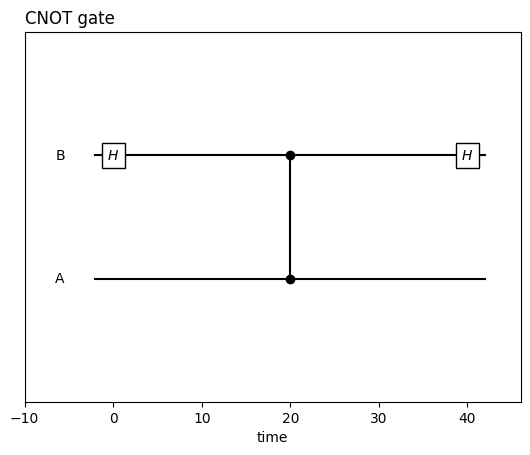

In [2]:
c.plot()

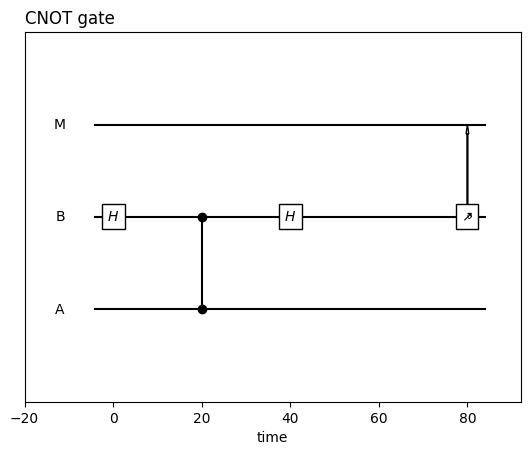

In [3]:
from quantumsim.circuit import uniform_noisy_sampler

c.add_qubit("M")

sampler = uniform_noisy_sampler(readout_error=0.03, seed=42)

c.add_measurement("B", time=80, output_bit="M", sampler=sampler);

c.plot();

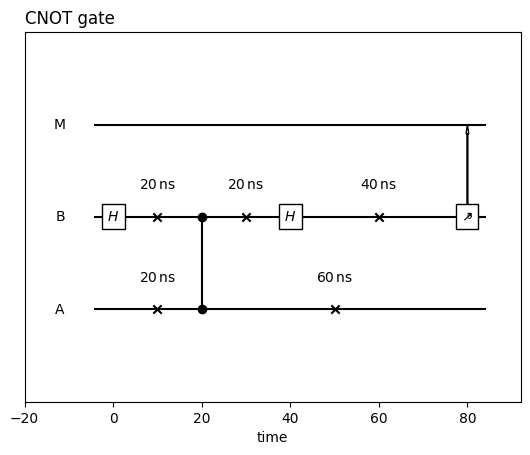

In [4]:
c.add_waiting_gates()
c.plot();

## Simulation

In [5]:
from quantumsim.sparsedm import SparseDM

sdm = SparseDM(c.get_qubit_names())

In [6]:
import quantumsim.sparsedm
print("GPU is used: ", quantumsim.sparsedm.using_gpu)

GPU is used:  False


In [7]:
sdm.classical['A'] = 1
print("initial state:", sdm.classical)

initial state: {'A': 1, 'B': 0, 'M': 0}


In [8]:
c.order()

In [10]:
c.apply_to(sdm)

In [11]:
print("classical bits after one round:", sdm.classical) 

classical bits after one round: {'M': 1, 'B': 1}


In [12]:
print("probability:", sdm.trace()) 

probability: 0.9383666908292512


In [13]:
measurements = []

for i in range(150):
    c.apply_to(sdm)
    measurements.append(sdm.classical['M'])

print("150 rounds of outcomes of CNOT-and-measurement:")
print(measurements)

150 rounds of outcomes of CNOT-and-measurement:
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
print("probability:", sdm.trace()) 

probability: 7.689884042799308e-12


In [15]:
# TODO: fidelity